In [37]:
### import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data overview

In [38]:
# set up filepath
home_data = pd.read_csv('./data/train.csv')

In [39]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
### which columns have the most NaNs?
home_data.isnull().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [41]:
# All of the features
features = list(home_data.columns)
print(f"{'#'*5} No of features in the training data is {len(features)} \n")
print(features)

# Numeric values only
num_features = list(home_data.select_dtypes(exclude='object').columns)
# Return a subset of the DataFrame’s columns based on the column dtypes.
print(f"\n{'#'*5} No of numerical features in the training data is {len(num_features)} \n")
print(num_features)

# Categorical values only
cat_features = list(home_data.select_dtypes(include='object').columns)
print(f"\n{'#'*5} No of categorical features in the training data is {len(cat_features)} \n")
print(cat_features)

##### No of features in the training data is 81 

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'

In [42]:
### checking basic columns statistics
home_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [43]:
### what is the range of properties age?
print(home_data.YearBuilt.min())
print(home_data.YearBuilt.max())

1872
2010


## Data visualization

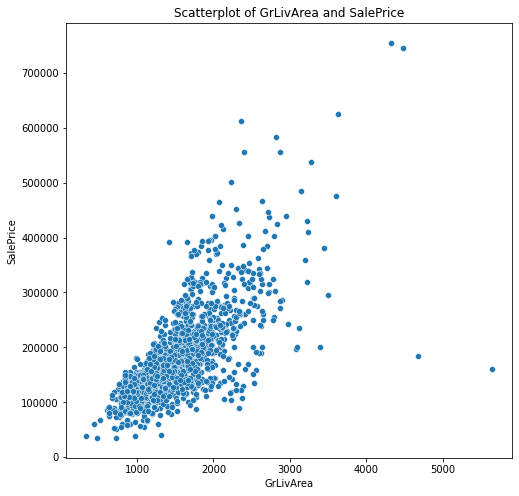

In [44]:
# scatterplot - releationship between Ground living area and Sale price

plt.figure(figsize=(8,8))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=home_data)
plt.title('Scatterplot of GrLivArea and SalePrice')
plt.show()

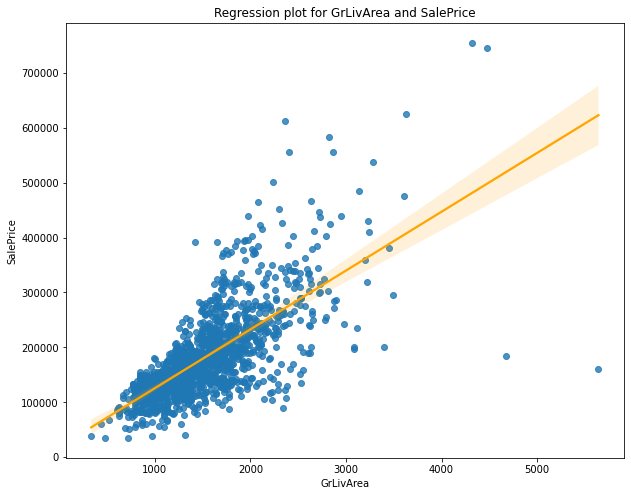

In [45]:
# regression plot

plt.figure(figsize=(10,8))
sns.regplot(x='GrLivArea', y='SalePrice', data=home_data, line_kws={"color":"orange"})
plt.title('Regression plot for GrLivArea and SalePrice')
plt.show()

In [46]:
correlation = home_data.SalePrice.corr(home_data.GrLivArea)
print(f"We can see a strong positive correlation between Ground Living Area and Sale Price, it is indeed {round(correlation,2)}")

We can see a strong positive correlation between Ground Living Area and Sale Price, it is indeed 0.71


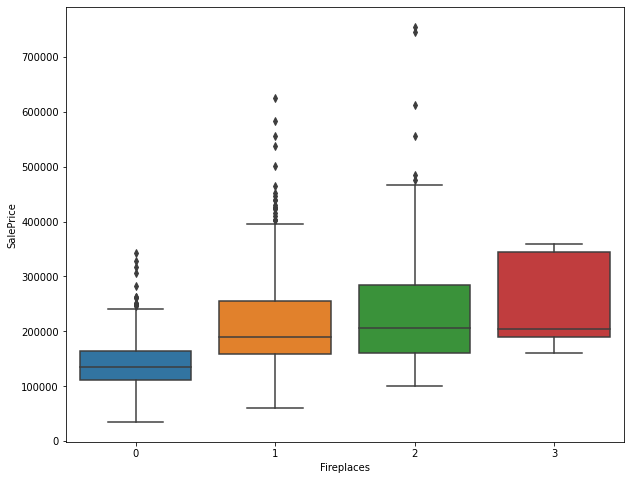

In [47]:
# let's see if number of fire places has any impact on SalePrice
plt.figure(figsize=(10,8))
sns.boxplot(x='Fireplaces', y='SalePrice', data=home_data)
plt.show()

We can see that most properties with no fireplace have lower prices.<br>
Properties with 1 or 2 fireplaces have some outliers with very high sale price.

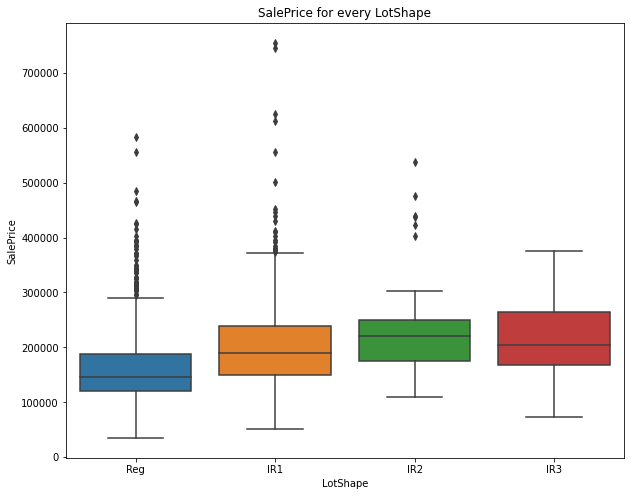

In [48]:
# let's see how the data about LotShape is spread out

plt.figure(figsize=(10,8))
sns.boxplot(x='LotShape', y='SalePrice', data=home_data)
plt.title('SalePrice for every LotShape')
plt.show()

Properties with slightly irregular shape (IR1) have the highest maximum, while IR2 shape has the highest median <br>
In Reg, IR1, IR2 we can identify some outliers.

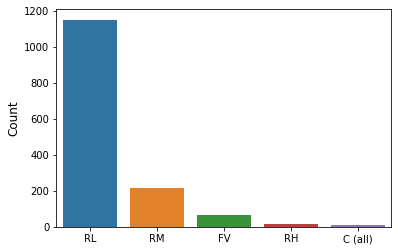

In [49]:
### let's see a bar plot of MSZoning - the general zoning classification of the sale.
# which zoning is the most frequent in the dataset?

# RL	Residential Low Density
# RM	Residential Medium Density
# FV	Floating Village Residential
# RH	Residential High Density
# C	    Commercial


sns.barplot(x=home_data.MSZoning.value_counts().index, y=home_data.MSZoning.value_counts())
plt.ylabel('Count', fontsize=12);

In [50]:
home_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

The most popular zoning is definitely Residential Low Density (1151 properties)

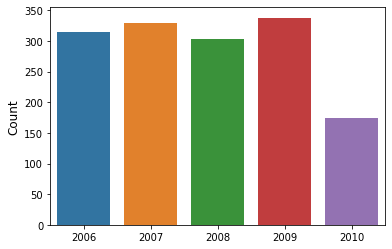

In [51]:
# how many houses were sold in each year?
# let's see the histogram

sns.barplot(x=home_data.YrSold.value_counts().index, y=home_data.YrSold.value_counts())
plt.ylabel('Count', fontsize=12);

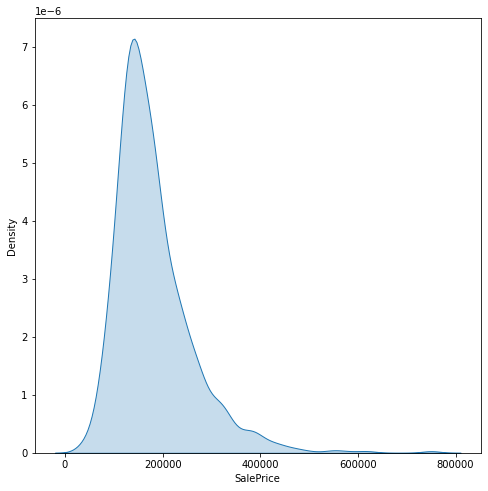

In [52]:
# let's see KDE plot for SalePrice - what is the probability of a property to have SalePrice in some range?

plt.figure(figsize=(8,8))
sns.kdeplot(data = home_data['SalePrice'], shade = True)
plt.show()

In [53]:
### checking correlation of SalePrice and other features
dependency = home_data.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(4)
dependency

# FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.0843,0.3518,0.2638,0.7910,-0.0779,0.5229,0.5071,0.4775,0.3864,-0.0114,...,0.3244,0.3159,-0.1286,0.0446,0.1114,0.0924,-0.0212,0.0464,-0.0289,1.0000
OverallQual,0.0326,0.2516,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4119,0.2397,-0.0591,...,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910
GrLivArea,0.0749,0.4028,0.2631,0.5930,-0.0797,0.1990,0.2874,0.3909,0.2082,-0.0096,...,0.2474,0.3302,0.0091,0.0206,0.1015,0.1702,-0.0024,0.0502,-0.0365,0.7086
GarageCars,-0.0401,0.2857,0.1549,0.6007,-0.1858,0.5379,0.4206,0.3642,0.2241,-0.0383,...,0.2263,0.2136,-0.1514,0.0358,0.0505,0.0209,-0.0431,0.0405,-0.0391,0.6404
GarageArea,-0.0987,0.3450,0.1804,0.5620,-0.1515,0.4790,0.3716,0.3731,0.2970,-0.0182,...,0.2247,0.2414,-0.1218,0.0351,0.0514,0.0610,-0.0274,0.0280,-0.0274,0.6234
TotalBsmtSF,-0.2385,0.3921,0.2608,0.5378,-0.1711,0.3915,0.2911,0.3639,0.5224,0.1048,...,0.2320,0.2473,-0.0955,0.0374,0.0845,0.1261,-0.0185,0.0132,-0.0150,0.6136
1stFlrSF,-0.2518,0.4572,0.2995,0.4762,-0.1442,0.2820,0.2404,0.3445,0.4459,0.0971,...,0.2355,0.2117,-0.0653,0.0561,0.0888,0.1315,-0.0211,0.0314,-0.0136,0.6059
FullBath,0.1316,0.1988,0.1260,0.5506,-0.1941,0.4683,0.4390,0.2768,0.0585,-0.0764,...,0.1877,0.2600,-0.1151,0.0354,-0.0081,0.0496,-0.0143,0.0559,-0.0197,0.5607
TotRmsAbvGrd,0.0404,0.3521,0.1900,0.4275,-0.0576,0.0956,0.1917,0.2807,0.0443,-0.0352,...,0.1660,0.2342,0.0042,-0.0067,0.0594,0.0838,0.0248,0.0369,-0.0345,0.5337
YearBuilt,0.0279,0.1233,0.0142,0.5723,-0.3760,1.0000,0.5929,0.3157,0.2495,-0.0491,...,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5229


In [54]:
# correlation with SalePrice only
dependency['SalePrice']

SalePrice        1.0000
OverallQual      0.7910
GrLivArea        0.7086
GarageCars       0.6404
GarageArea       0.6234
TotalBsmtSF      0.6136
1stFlrSF         0.6059
FullBath         0.5607
TotRmsAbvGrd     0.5337
YearBuilt        0.5229
YearRemodAdd     0.5071
GarageYrBlt      0.4864
MasVnrArea       0.4775
Fireplaces       0.4669
BsmtFinSF1       0.3864
LotFrontage      0.3518
WoodDeckSF       0.3244
2ndFlrSF         0.3193
OpenPorchSF      0.3159
HalfBath         0.2841
LotArea          0.2638
BsmtFullBath     0.2271
BsmtUnfSF        0.2145
BedroomAbvGr     0.1682
ScreenPorch      0.1114
PoolArea         0.0924
MoSold           0.0464
3SsnPorch        0.0446
BsmtFinSF2      -0.0114
BsmtHalfBath    -0.0168
MiscVal         -0.0212
LowQualFinSF    -0.0256
YrSold          -0.0289
OverallCond     -0.0779
MSSubClass      -0.0843
EnclosedPorch   -0.1286
KitchenAbvGr    -0.1359
Name: SalePrice, dtype: float64

In [55]:
features = dependency['SalePrice']
top_five = list(features.index)[1:6]
print(f"Top 5 features with the highest positive correlation with SalePrice are: {', '.join(top_five)}")

Top 5 features with the highest positive correlation with SalePrice are: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF


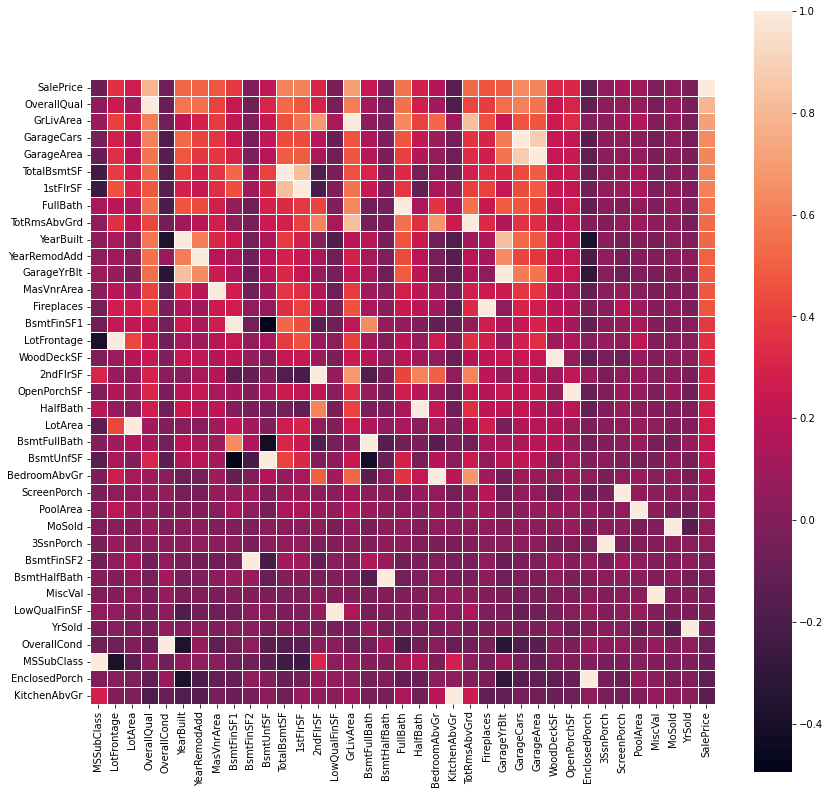

In [56]:
# let's see the heatmap of all the features
plt.subplots(figsize=(14, 14))
sns.heatmap(dependency, square=True, linewidths=0.8);

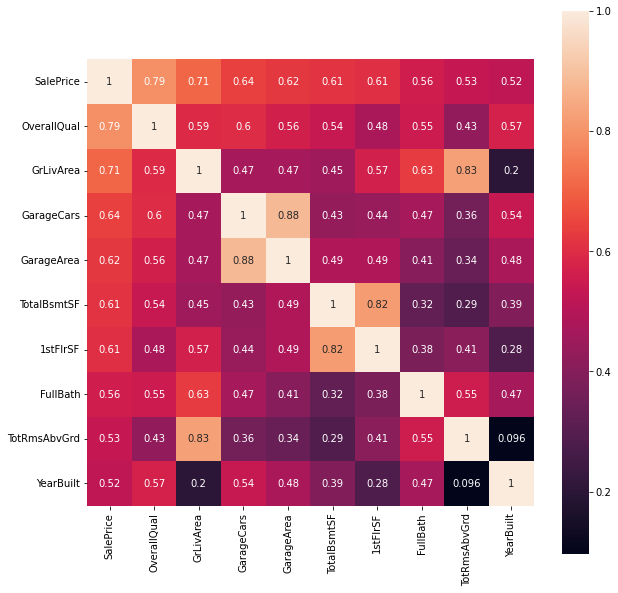

In [57]:
# visualisation of top 10 features
top_ten = dependency['SalePrice'][:10].index
correlations = np.corrcoef(home_data[top_ten].values.T) 
# creating new df with correlations and taking values
plt.figure(figsize=(10,10))

h_map = sns.heatmap(correlations, annot=True, yticklabels=top_ten.values, xticklabels=top_ten.values, square=True)
plt.show()

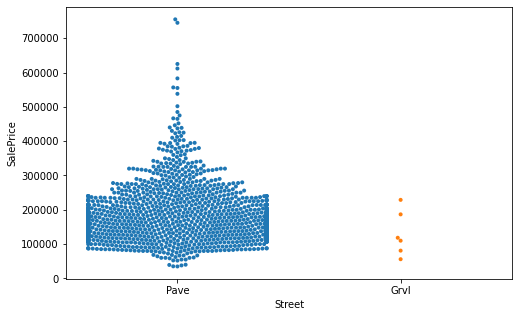

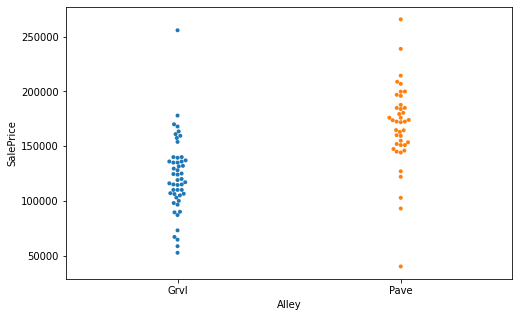

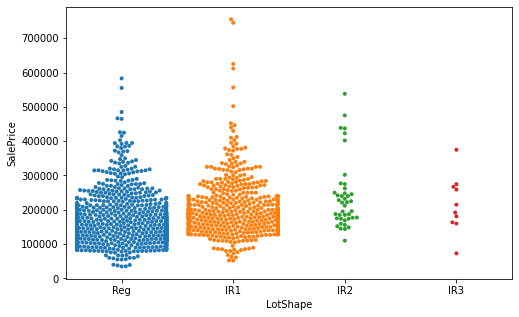

In [58]:
# swarmplots - categorical stcatterplot for SalePrice and Street, Alley, LotShape

for feature in cat_features[1:4]:
    plt.figure(figsize=(8,5))
    sns.swarmplot(x=feature, y='SalePrice', data=home_data, s=4)
    plt.show()


<b>Street</b> - Most of the properties have Street access, mainly paved. <br>
<b>Alley</b> - Among dwellings with Alley access higher prices can be seen where alleys are paved <br>

<b>LotShape</b> - In terms of general property shape, the most popular is Regular (Reg) and Slightly irregular (IR1). <br> Moderately irregular (IR2) and Irregular (IR3) shapes are in minority, also the last one doesn't reach prices higher than 400,000$